# Implementación

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

img=cv2.imread("20240101_1200_hmiigr_512.jpg")

rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

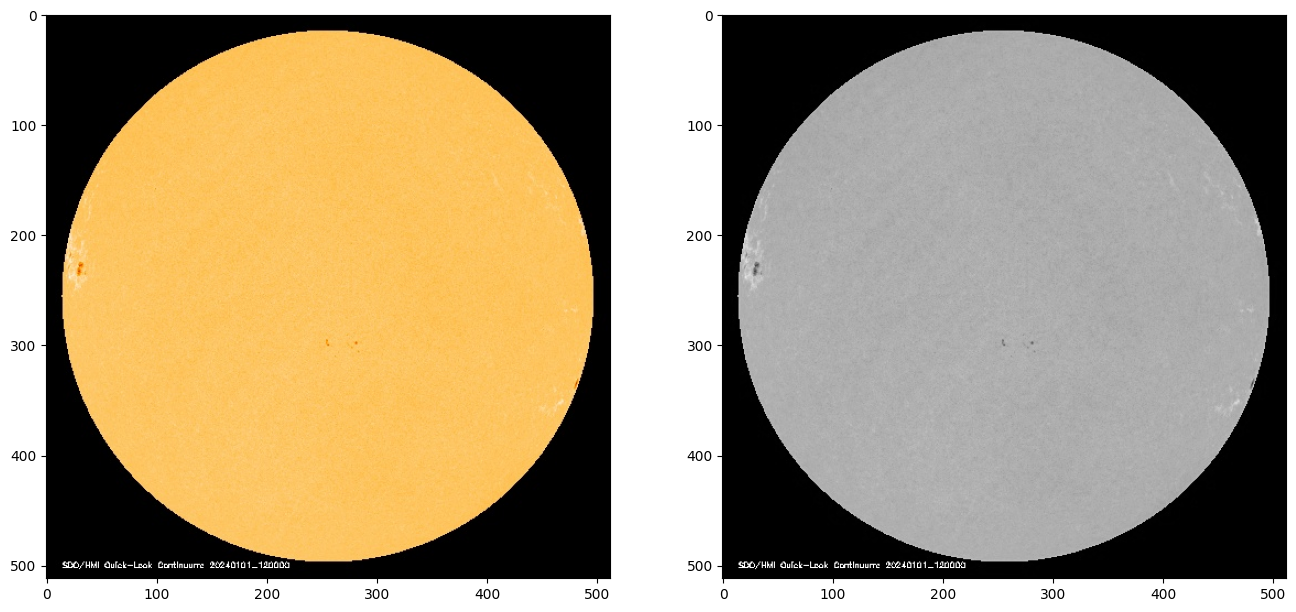

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.imshow(rgb_img)

plt.subplot(122)
plt.imshow(gray_img, "gray")

plt.show()

In [ ]:
# Histograma
hist = cv2.calcHist([gray_img],[0],None,[256],[0,256])

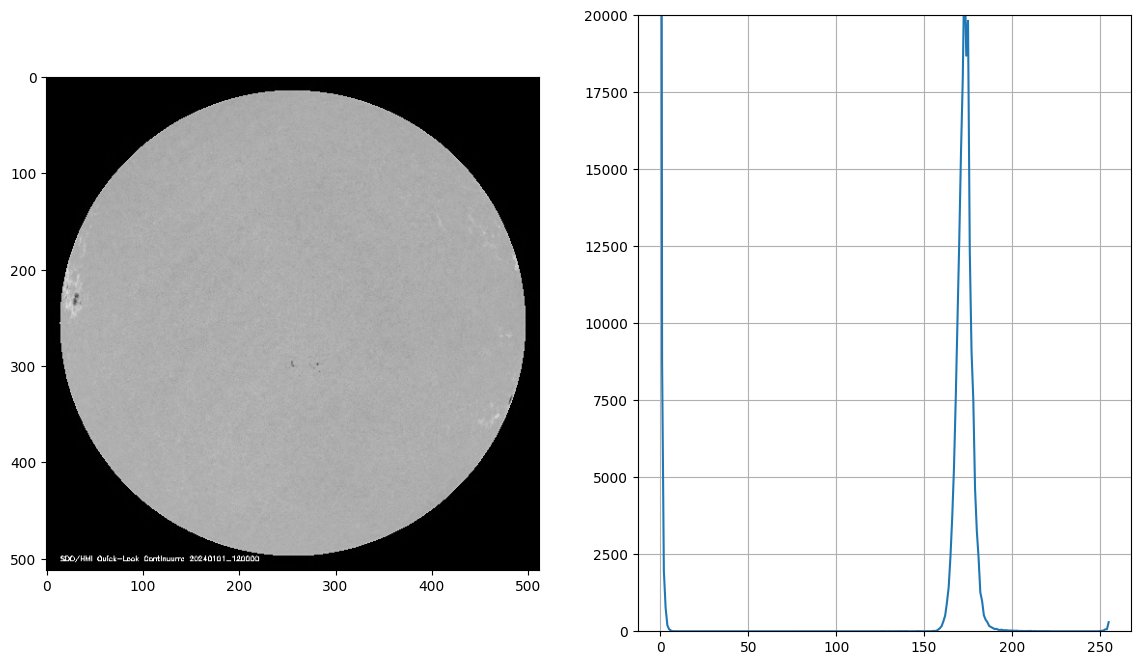

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(121)
plt.imshow(gray_img, "gray")

plt.subplot(122)
plt.plot(hist)
plt.ylim([0,20000])
plt.grid("on")

plt.show()

In [ ]:
# Segmentación por imagen
u_down= 90
u_up = 155
imbn = cv2.inRange(gray_img,u_down,u_up)
type(imbn)

numpy.ndarray

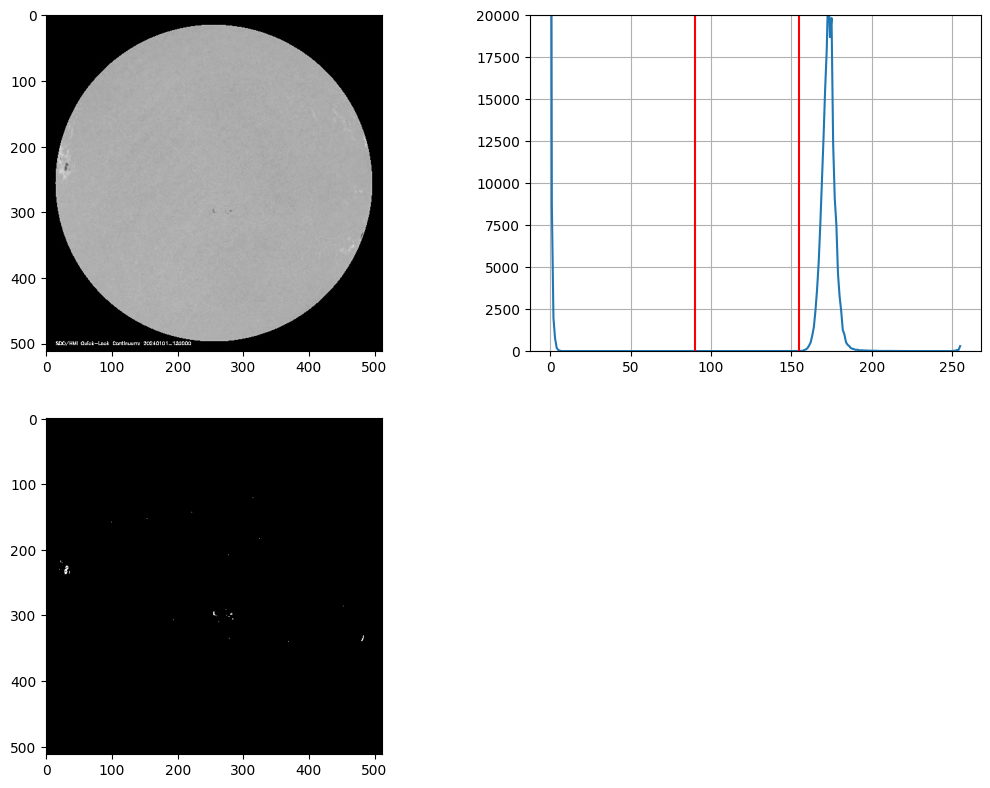

In [ ]:
plt.figure(figsize=(12.8,9.6))

plt.subplot(221)
plt.imshow(gray_img, "gray")

plt.subplot(222)
plt.plot(hist)
plt.plot([u_down, u_down], [0, max(hist.flatten())], "r", label=f'Line at {u_down}')
plt.plot([u_up, u_up], [0, max(hist.flatten())], "r", label=f'Line at {u_up}')
plt.ylim([0,20000])
plt.grid("on")

plt.subplot(223)
plt.imshow(imbn, "gray")

plt.show()

In [ ]:
from google.colab.patches import cv2_imshow

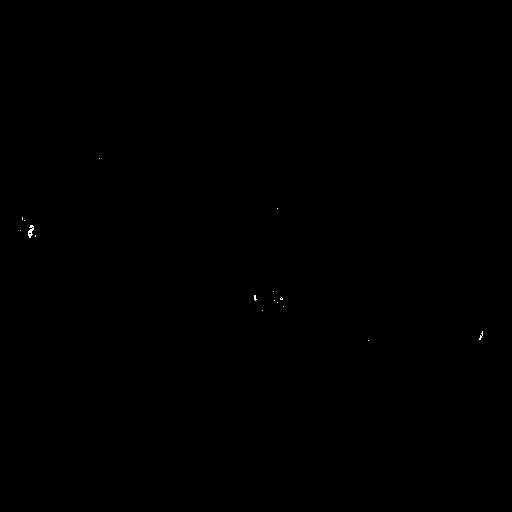

In [ ]:

cv2_imshow(imbn)


In [ ]:
imbn

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
def process_image(image_path, u_down, u_up):
    """
    Lee una imagen, la convierte a escala de grises y filtra los valores dentro de un umbral.

    Parámetros:
    - image_path: str, ruta de la imagen.
    - u_down: int, límite inferior del umbral.
    - u_up: int, límite superior del umbral.

    Retorna:
    - img: Imagen original.
    - gray_img: Imagen en escala de grises.
    - imbn: Imagen binaria filtrada dentro del umbral.
    """
    # Leer la imagen
    img = cv2.imread(image_path)

    if img is None:
        raise FileNotFoundError(f"No found: {image_path}")

    # Convertir a escala de grises
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Filtrar los valores dentro del umbral
    imbn = cv2.inRange(gray_img, u_down, u_up)

    return img, gray_img, imbn

image_path = "20240101_1200_hmiigr_1024.jpg"
u_down = 90
u_up = 150

img1024, gray_img1024, imbn1024 = process_image(image_path, u_down, u_up)



In [ ]:
hist = cv2.calcHist([gray_img1024],[0],None,[256],[0,256])

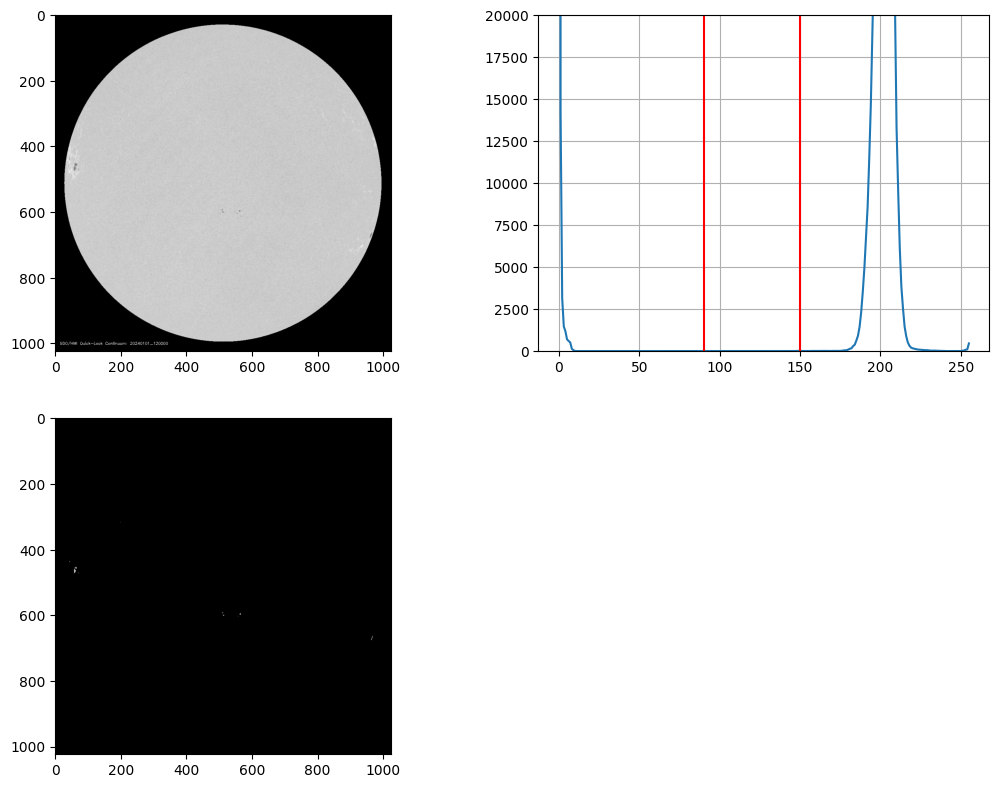

In [ ]:
plt.figure(figsize=(12.8,9.6))

plt.subplot(221)
plt.imshow(gray_img1024, "gray")

plt.subplot(222)
plt.plot(hist)
plt.plot([u_down, u_down], [0, max(hist.flatten())], "r", label=f'Line at {u_down}')
plt.plot([u_up, u_up], [0, max(hist.flatten())], "r", label=f'Line at {u_up}')
plt.ylim([0,20000])
plt.grid("on")

plt.subplot(223)
plt.imshow(imbn1024, "gray")

plt.show()

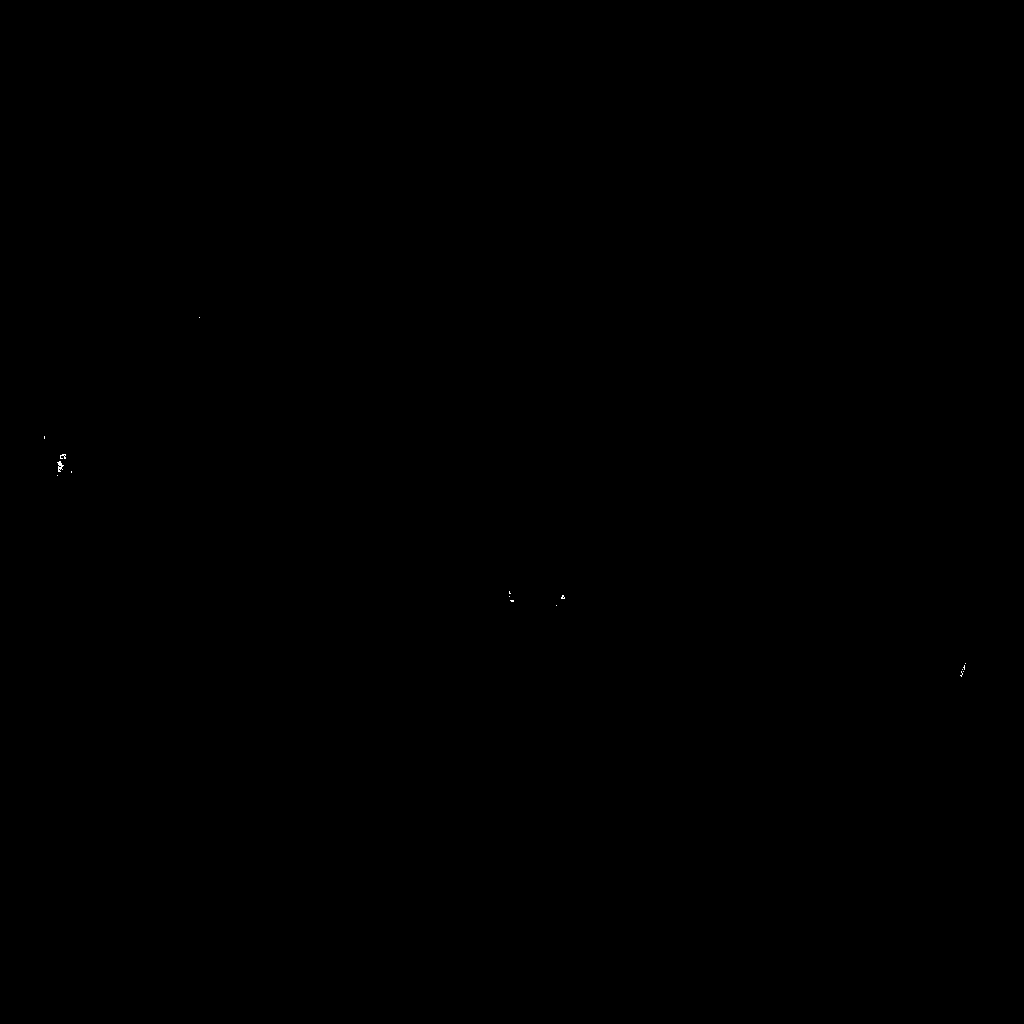

In [ ]:
cv2_imshow(imbn1024)

In [ ]:
_bins = 256

hist2024, _ = np.histogram(gray_img1024.ravel(), bins=_bins, range=(0, _bins))

In [ ]:
prob_dist = hist2024 / hist2024.sum()
image_entropy = entropy(prob_dist, base=2)
print(f"Image Entropy {image_entropy}")

Image Entropy 4.0963330358460635


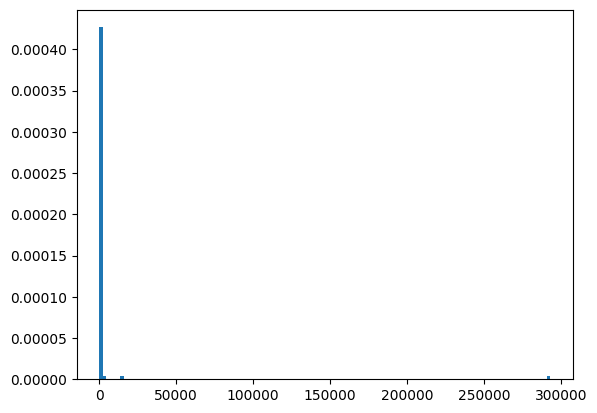

In [ ]:
plt.hist(hist2024, density=1, bins=_bins)

plt.show()

In [ ]:
#Prueba
foto = "Prueba_entropy.png"
u_down = 90
u_up = 150

ifoto, g_ifoto, filtrado = process_image(foto, u_down, u_up)

_bins = 256

#histleon, _ = np.histogram(g_ifoto.ravel(), bins=_bins, range=(0, _bins))
histleon = cv2.calcHist([g_ifoto],[0],None,[256],[0,256])

prob_dist = histleon / histleon.sum()
image_entropy = entropy(prob_dist, base=2)
print(f"Image Entropy {image_entropy}")

Image Entropy [7.078116]


In [ ]:
prob_dist = histleon / histleon.sum()
image_entropy = entropy(prob_dist, base=2)
print(f"Image Entropy {image_entropy}")

Image Entropy [7.078116]


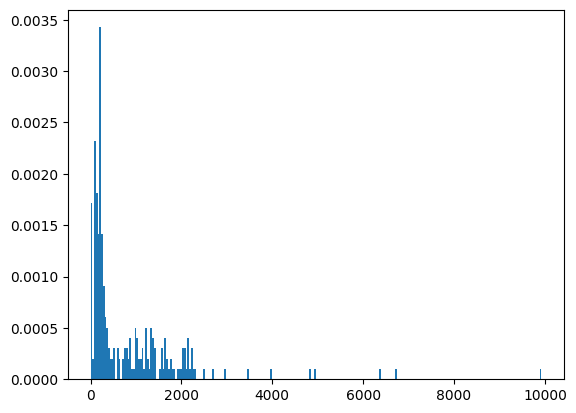

In [ ]:
plt.hist(histleon, density=1, bins=_bins)

plt.show()

# Implementación PRE
**importante:**

Este espacio se dividirá en dos sección, la primera línea con todas las funciones y la segunda con todo el código para el funcionamiento del análisi

## Paquetería


In [ ]:
# Paquetería
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from skimage.feature import graycomatrix
from scipy.stats import entropy
import pandas as pd

In [ ]:
# Procesamiento de imagen process_hmiigr512
def process_hmiigr512(img_path, u_down, u_up):
    """
    Lee una imagen, la convierte a escala de grises y filtra los valores dentro de un umbral.

    Parámetros:
    - image_path: str, ruta de la imagen.
    - u_down: int, límite inferior del umbral.
    - u_up: int, límite superior del umbral.

    Retorna:
    - img: Imagen original.
    - gray_img: Imagen en escala de grises.
    - imbn: Imagen binaria filtrada dentro del umbral.
    """
    # Leer la imagen
    img = cv2.imread(img_path)

    if img is None:
        raise FileNotFoundError(f"No found: {img}")

    # Limpieza de la etiqueta
    x, y, w, h = 7, 495, 223, 10
    vpixel = 0

    # Crear una copia de la imagen original
    img_modify = img.copy()

    # Cambiar los valores de los píxeles en el área definida
    img_modify[y:y+h, x:x+w] = vpixel

    # Convertir a escala de grises
    gray_img = cv2.cvtColor(img_modify, cv2.COLOR_BGR2GRAY)

    # Filtrar los valores dentro del umbral
    imbn = cv2.inRange(gray_img, u_down, u_up)

    return img_modify, gray_img, imbn


# Procesamiento de imagen process_mdiigr512
def process_mdiigr512(img_path, u_down, u_up):
    """
    Lee una imagen, la convierte a escala de grises y filtra los valores dentro de un umbral.

    Parámetros:
    - image_path: str, ruta de la imagen.
    - u_down: int, límite inferior del umbral.
    - u_up: int, límite superior del umbral.

    Retorna:
    - img: Imagen original.
    - gray_img: Imagen en escala de grises.
    - imbn: Imagen binaria filtrada dentro del umbral.
    """
    # Leer la imagen
    img = cv2.imread(img_path)

    if img is None:
        raise FileNotFoundError(f"No found: {img}")

    # Limpieza de la etiqueta
    x, y, w, h = 1, 495, 183, 15
    vpixel = 0

    # Crear una copia de la imagen original
    img_modify = img.copy()

    # Cambiar los valores de los píxeles en el área definida
    img_modify[y:y+h, x:x+w] = vpixel

    # Convertir a escala de grises
    gray_img = cv2.cvtColor(img_modify, cv2.COLOR_BGR2GRAY)

    clean_gray = gray_img.copy()

    # Limpiar el contorno
    centro = (256, 256)  # Coordenadas (x, y)
    radio = 248  # Radio de la circunferencia
    valor_pixel = 255
    grosor = 3

    cv2.circle(clean_gray, centro, radio, valor_pixel, grosor)

    # Filtrar los valores dentro del umbral
    imbn = cv2.inRange(clean_gray, u_down, u_up)

    return img_modify, clean_gray, imbn

# Contador de pixel's
def count_value(arr, value):
    return np.sum(arr == value)


# Función de optimización de entropía
def calculate_glcm_entropy(image, distances, angles):
    best_entropy = -np.inf
    best_params = (None, None)

    for d in distances:
        for a in angles:
            glcm = graycomatrix(image, distances=[d], angles=[a], symmetric=True, normed=True)
            glcm_entropy = -np.sum(glcm * np.log2(glcm + (glcm == 0)))

            if glcm_entropy > best_entropy:
                best_entropy = glcm_entropy
                best_params = (d, a)

    return best_params, best_entropy

In [ ]:
def plot_image_processing(image_path, format, u_down, u_up):

    # Escoger el formato
    if format == "mdiigr":
        image, gray_image, filter_image = process_mdiigr512(image_path, u_down, u_up)
    elif format == "hmiigr":
        image, gray_image, filter_image = process_hmiigr512(image_path, u_down, u_up)
    else:
        raise ValueError("Unsupported format")

    # Histograma
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Graficar
    plt.figure(figsize=(12.8, 9.6))

    plt.subplot(221)
    plt.imshow(gray_image, cmap="gray")
    plt.title("Escala de grises")

    plt.subplot(222)
    plt.plot(hist)
    plt.plot([u_down, u_down], [0, max(hist.flatten())], "r", label=f'Línea en {u_down}')
    plt.plot([u_up, u_up], [0, max(hist.flatten())], "r", label=f'Línea en {u_up}')
    plt.ylim([0, 100])
    plt.grid("on")
    plt.title("Ocurrencia de bines")

    plt.subplot(223)
    plt.imshow(filter_image, cmap="gray")
    plt.title("Sunspot")

    plt.show()

In [ ]:
# Función para procesar la imagen con limpieza de la etiqueta y umbralización
def process_image1024(image_path, u_down, u_up):
    # Leer la imagen
    img = cv2.imread(image_path)

    if img is None:
        raise FileNotFoundError(f"No se encontró la imagen: {image_path}")

    # Limpieza de la etiqueta
    x, y, w, h = 15, 996, 331, 12
    vpixel = 0

    # Crear una copia de la imagen original
    img_modify = img.copy()

    # Cambiar los valores de los píxeles en el área definida
    img_modify[y:y+h, x:x+w] = vpixel

    # Convertir a escala de grises
    gray_img = cv2.cvtColor(img_modify, cv2.COLOR_BGR2GRAY)

    # Filtrar los valores dentro del umbral
    imbn = cv2.inRange(gray_img, u_down, u_up)

    return img_modify, gray_img, imbn

# Función para calcular la dimensión fractal usando el método de conteo de cajas
def box_count(img, k):
    S = np.add.reduceat(
        np.add.reduceat(img, np.arange(0, img.shape[0], k), axis=0),
        np.arange(0, img.shape[1], k), axis=1)
    return len(np.where((S > 0) & (S < k*k))[0])

def fractal_dimension(img):
    # Tamaños de las cajas en función del tamaño de la imagen
    min_size = 2
    max_size = min(img.shape) // 2
    sizes = np.logspace(np.log2(min_size), np.log2(max_size), num=10, base=2, dtype=int)
    sizes = sizes[sizes > 1]

    counts = []
    for size in sizes:
        count = box_count(img, size)
        if count > 0:  # Asegurarse de que count no sea cero
            counts.append(count)
        else:
            counts.append(1)  # Evitar división por cero

    # Verificar los valores calculados
    print(f"Tamaños de caja (S): {sizes}")
    print(f"Conteos (N): {counts}")

    if len(counts) < 2:
        return np.nan  # No se puede calcular la dimensión fractal con menos de dos tamaños de cajas válidos

    log_sizes = np.log(sizes)
    log_counts = np.log(counts)

    # Verificar los valores de logaritmos
    #print(f"Logaritmo de tamaños de caja (log S): {log_sizes}")
    #print(f"Logaritmo de conteos (log N): {log_counts}")

    # Calcular la dimensión fractal usando la relación directa
    coeffs = np.polyfit(log_sizes, log_counts, 1)
    return coeffs[0]

# Procesar una sola imagen y calcular la dimensión fractal utilizando la imagen binaria
def process_single_image(imbn):
    fractal_dim = fractal_dimension(imbn)
    img_resized = cv2.resize(imbn, (64, 64)).flatten()
    return fractal_dim, img_resized

In [ ]:
def extract_values(image_path,format, u_down, u_up):

    if format == "mdiigr":
        image, gray_image, filter_image = process_mdiigr512(image_path, u_down, u_up)
    elif format == "hmiigr":
        image, gray_image, filter_image = process_hmiigr512(image_path, u_down, u_up)
    else:
        raise ValueError("Unsupported format")

    # Contar los pixeles blancos asociados a los sunspot
    count = count_value(filter_image, 255)

    # Define distances and angles
    distances = [1, 2, 3, 4, 5]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

    # Encontrar los mejores parámetros para la imagen en escala de grises
    best_params_g, best_entropy_g = calculate_glcm_entropy(gray_image, distances, angles)
    grad_g = math.degrees(best_params_g[1])

    # Encontrar los mejores parámetros para la imagen filtrada
    best_params_f, best_entropy_f = calculate_glcm_entropy(filter_image, distances, angles)
    grad_f = math.degrees(best_params_f[1])

    # D-FRACTAL de datos filtrados
    d_fractal_f, img_resized = process_single_image(filter_image)

    # Crear DataFrame
    data = {
        "n_pixel": [count],
        "B_entropy_g": [best_entropy_g],
        "B_entropy_f": [best_entropy_f],
        "D_fractal": [d_fractal_f]
    }

    df = pd.DataFrame(data)

    return df

In [ ]:
   # 1024 image
   # x, y, w, h = 15, 996, 331, 12
   # vpixel = 0

Notas:
La entropía cambia en un 0.05 al limpiar la etiqueta:

- Entropía con etiqueta 6.789592751584312
- Entropía sin etiqueta 6.73154732740338
- Diferencia: 0.05804542418093206


## Prueba 1 (img512)

Pasos:
1. Leer la img
1. Limpiar la img (quitar la etiqueta )
2. Establer filtros
3. histograma
4. graficar + filtrado
5. contar pixel's = 255 de filtrado
6. Obtener la entropía a partir de una optimziación
7. Obtener la fractalidad de la imagen

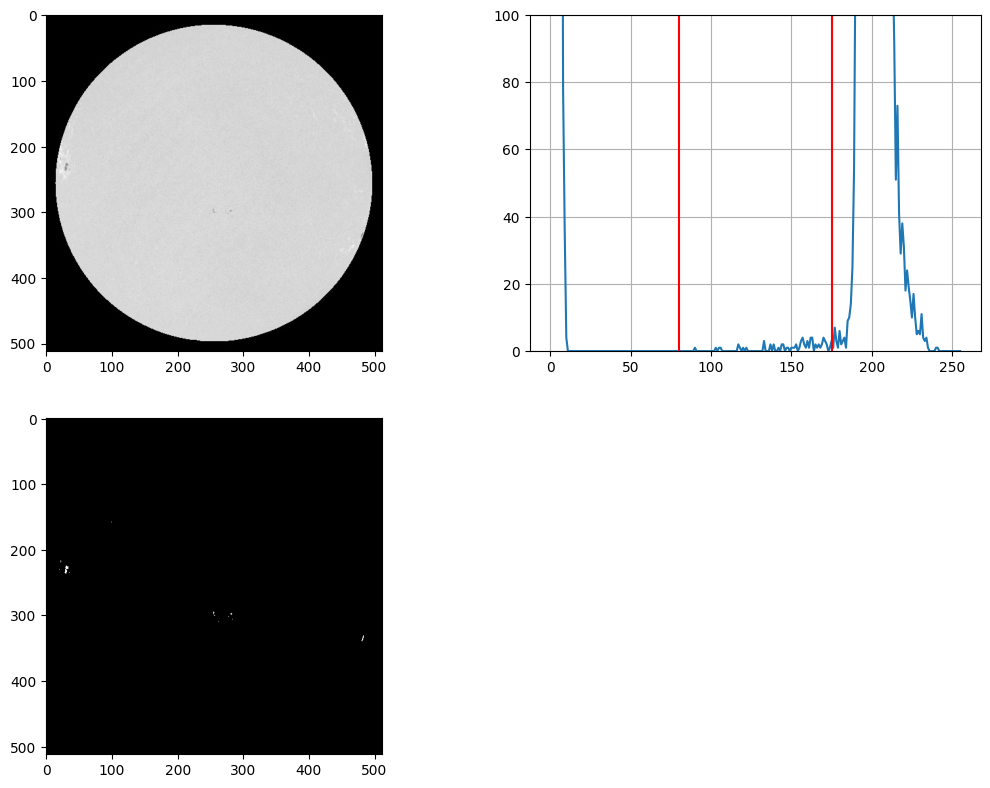

In [ ]:
# Imagen
image_path = "20240101_1200_hmiigr_512.jpg"


# filtros
u_down=80
u_up=175

# procesamiento
image, gray_image, filter_image = process_hmiigr512(image_path, u_down, u_up)

# Histograma
hist = cv2.calcHist([gray_image],[0],None,[256],[0,256])

# Graficar
plt.figure(figsize=(12.8,9.6))

plt.subplot(221)
plt.imshow(gray_image, "gray")

plt.subplot(222)
plt.plot(hist)
plt.plot([u_down, u_down], [0, max(hist.flatten())], "r", label=f'Line at {u_down}')
plt.plot([u_up, u_up], [0, max(hist.flatten())], "r", label=f'Line at {u_up}')
plt.ylim([0,100])
plt.grid("on")

plt.subplot(223)
plt.imshow(filter_image, "gray")

plt.show()

In [ ]:
# Contar los pixeles blancos
count = count_value(filter_image, 255)
print(f"Tienes {count} pixel's blancos")

Tienes 72 pixel's blancos


In [ ]:
# Define distances and angles
distances = [1, 2, 3, 4, 5]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Encontrar los mejores parámetros
best_params, best_entropy = calculate_glcm_entropy(gray_image, distances, angles)
grad = math.degrees(best_params[1])

print(f"Mejor distancia: {best_params[0]}")
print(f"Mejor ángulo: {grad}")
print(f"Entropía máxima: {best_entropy}");

Mejor distancia: 5
Mejor ángulo: 45.0
Entropía máxima: 6.73154732740338


In [ ]:
distances = [1, 2, 3, 4, 5]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Encontrar los mejores parámetros
best_params, best_entropy = calculate_glcm_entropy(filter_image, distances, angles)
grad = math.degrees(best_params[1])

print(f"Mejor distancia: {best_params[0]}")
print(f"Mejor ángulo: {grad}")
print(f"Entropía máxima: {best_entropy}");

Mejor distancia: 5
Mejor ángulo: 45.0
Entropía máxima: 0.007393367935298555


In [ ]:
# Guardar data
#np.savetxt("ruta1024.csv", gray_img1024, delimiter=',', fmt='%d')

### prueba mdiigr

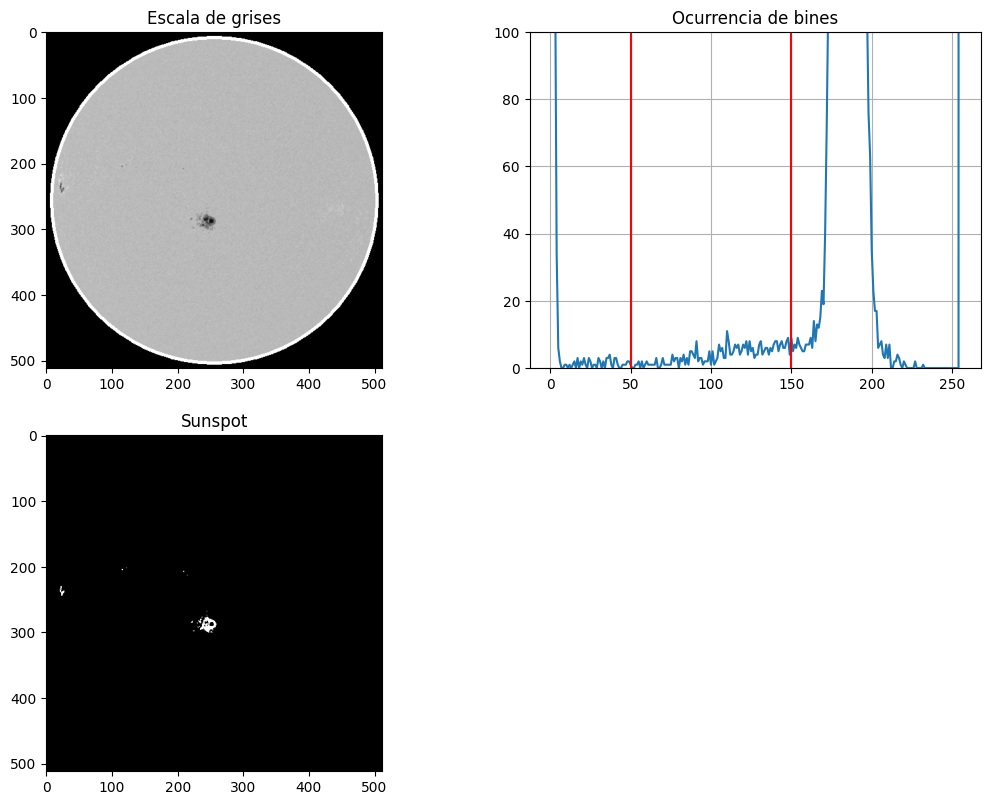

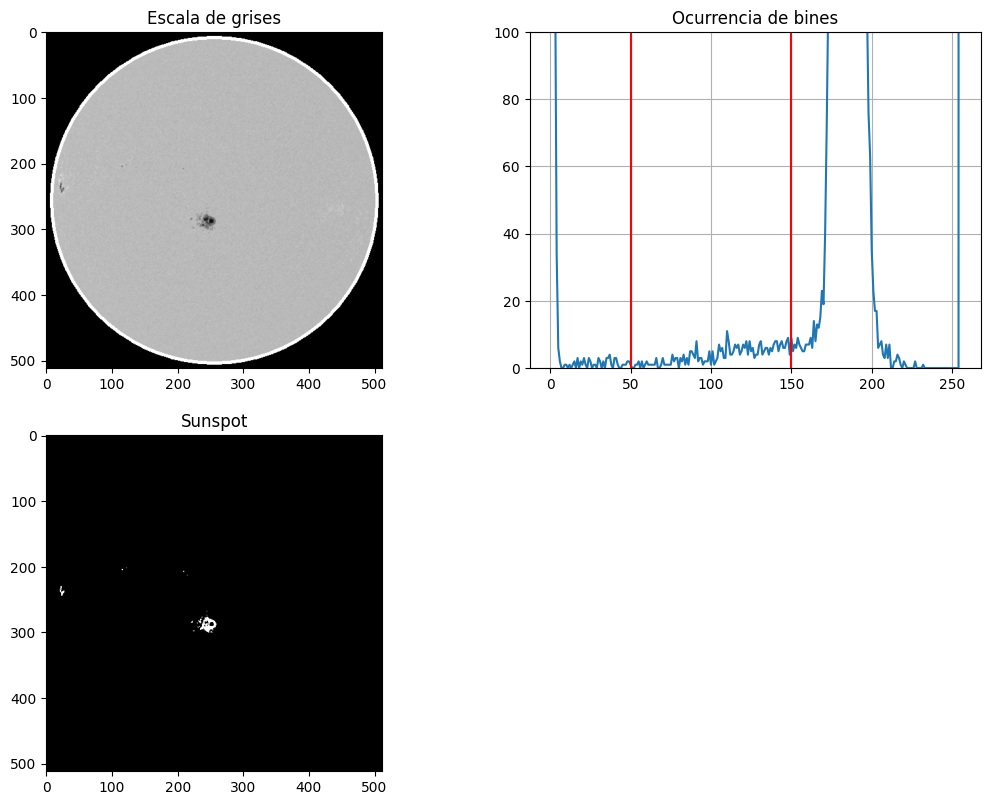

In [ ]:
# Imagen
image_path_20040107_1241 = "20040107_1241_mdiigr_512.jpg"

# filtros
u_down=50
u_up=150

# procesamiento
image, gray_image, filter_image = process_mdiigr512(image_path_20040107_1241, u_down, u_up)

# Histograma
hist = cv2.calcHist([gray_image],[0],None,[256],[0,256])

# Graficar
plot_image_processing(image_path_20040107_1241, u_down, u_up)

In [ ]:
df = extract_values(image_path_20040107_1241,"mdiigr", u_down, u_up)
print(df)

Tamaños de caja (S): [  2   3   5  10  17  29  50  87 149 256]
Conteos (N): [1, 1, 1, 1, 3, 3, 4, 2, 2, 2]
   n_pixel  Best_entropy_gray  Best_entropy_filter  D_fractal
0      386            6.95819             0.028438    0.20795


In [ ]:
# Contar los pixeles blancos asociados a los sunspot
count = count_value(filter_image, 255)
print(f"Tienes {count} pixel's blancos")

Tienes 386 pixel's blancos


In [ ]:
# Define distances and angles
distances = [1, 2, 3, 4, 5]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Encontrar los mejores parámetros
best_params, best_entropy_g = calculate_glcm_entropy(gray_image, distances, angles)
grad = math.degrees(best_params[1])

print(f"Mejor distancia: {best_params[0]}")
print(f"Mejor ángulo: {grad}")
print(f"Entropía máxima (grises): {best_entropy_g}");

Mejor distancia: 5
Mejor ángulo: 135.0
Entropía máxima (grises): 6.958190345695745


In [ ]:
distances = [1, 2, 3, 4, 5]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Encontrar los mejores parámetros del img filtrado
best_params, best_entropy_f = calculate_glcm_entropy(filter_image, distances, angles)
grad = math.degrees(best_params[1])

print(f"Mejor distancia: {best_params[0]}")
print(f"Mejor ángulo: {grad}")
print(f"Entropía máxima (filtrado): {best_entropy_f}");

Mejor distancia: 5
Mejor ángulo: 135.0
Entropía máxima (filtrado): 0.02843788065235027


In [ ]:
## D-FRACTAL de datos filtrados
d_fractal_f, img_resized = process_single_image(filter_image)
print(f"Dimensión Fractal (filtrado): {d_fractal_f}")

Tamaños de caja (S): [  2   3   5  10  17  29  50  87 149 256]
Conteos (N): [1, 1, 1, 1, 3, 3, 4, 2, 2, 2]
Dimensión Fractal (filtrado): 0.20794975125584012


In [ ]:
## D-FRACTAL de datos filtrados
d_fractal_g, img_resized = process_single_image(gray_image)
print(f"Dimensión Fractal (grises): {d_fractal_g}")

Tamaños de caja (S): [  2   3   5  10  17  29  50  87 149 256]
Conteos (N): [237, 262, 133, 41, 21, 8, 9, 2, 1, 1]
Dimensión Fractal (grises): -1.2684056327896875


In [ ]:
print(f"{count}, {best_entropy_g},  {best_entropy_f}, {d_fractal_g}, {d_fractal_f}" )

386, 6.958190345695745,  0.02843788065235027, -1.2684056327896875, 0.20794975125584012


### Fractal


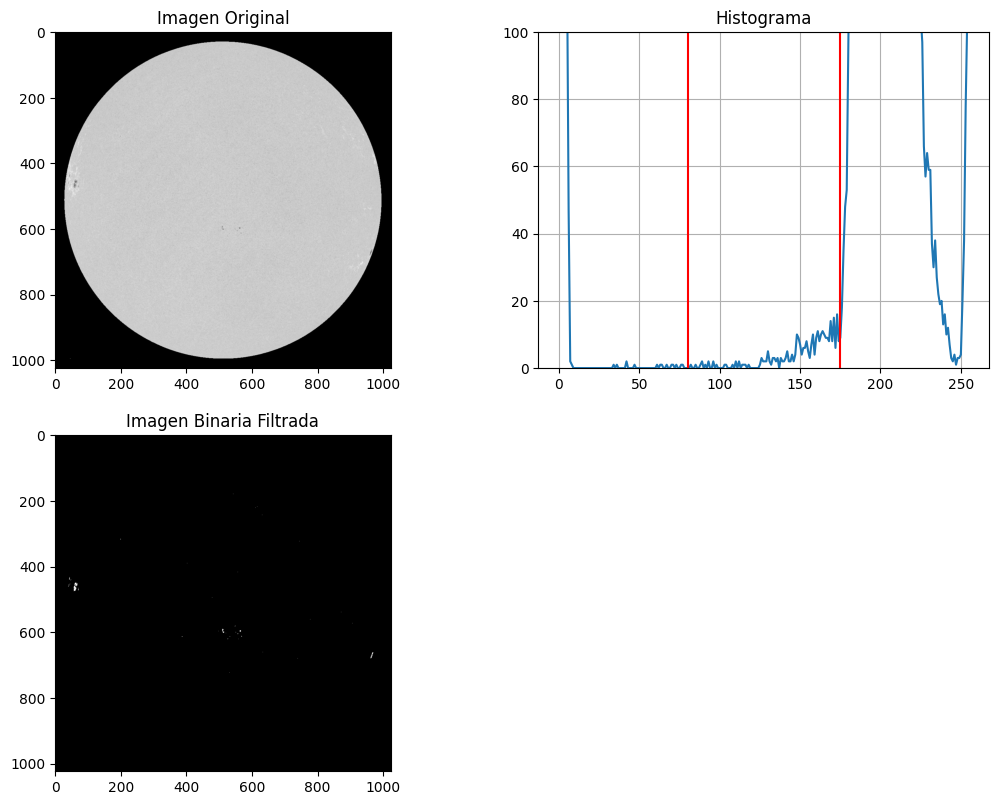

In [ ]:
### Fractal

# Ejemplo de uso
image_path = "20240101_1200_hmiigr_1024.jpg"

# Filtros
u_down = 80
u_up = 175

image, gray_image, filter_image = process_image1024(image_path, u_down, u_up)

# Mostrar la imagen original, la imagen en escala de grises y la imagen binaria filtrada
plt.figure(figsize=(12.8, 9.6))

plt.subplot(221)
plt.imshow(gray_image, "gray")
plt.title("Imagen Original")

plt.subplot(223)
plt.imshow(filter_image, "gray")
plt.title("Imagen Binaria Filtrada")

# Histograma
hist = cv2.calcHist([cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)], [0], None, [256], [0, 256])
plt.subplot(222)
plt.plot(hist)
plt.plot([u_down, u_down], [0, max(hist.flatten())], "r", label=f'Linea en {u_down}')
plt.plot([u_up, u_up], [0, max(hist.flatten())], "r", label=f'Linea en {u_up}')
plt.ylim([0, 100])
plt.grid(True)
plt.title("Histograma")

plt.show()


In [ ]:
# Procesar la imagen y calcular la dimensión fractal

image_data, d_fractal, binary_image = process_single_image(image_path, u_down, u_up)
print(f"Dimensión Fractal: {d_fractal}")

Tamaños de caja (S): [  2   3   6  12  23  43  80 149 276 512]
Conteos (N): [1, 1, 1, 1, 17, 19, 17, 14, 9, 4]
Dimensión Fractal: 0.4831619748457664


### Fractal mdiigr


In [ ]:
# Procesar la imagen y calcular la dimensión fractal

image_data, d_fractal, binary_image = process_single_image(image_path_20040107_1241, u_down, u_up)
print(f"Dimensión Fractal: {d_fractal}")

Tamaños de caja (S): [  2   3   5  10  17  29  50  87 149 256]
Conteos (N): [1, 1, 1, 1, 5, 9, 16, 5, 6, 2]
Dimensión Fractal: 0.39695144743570976


# Prueba final de función

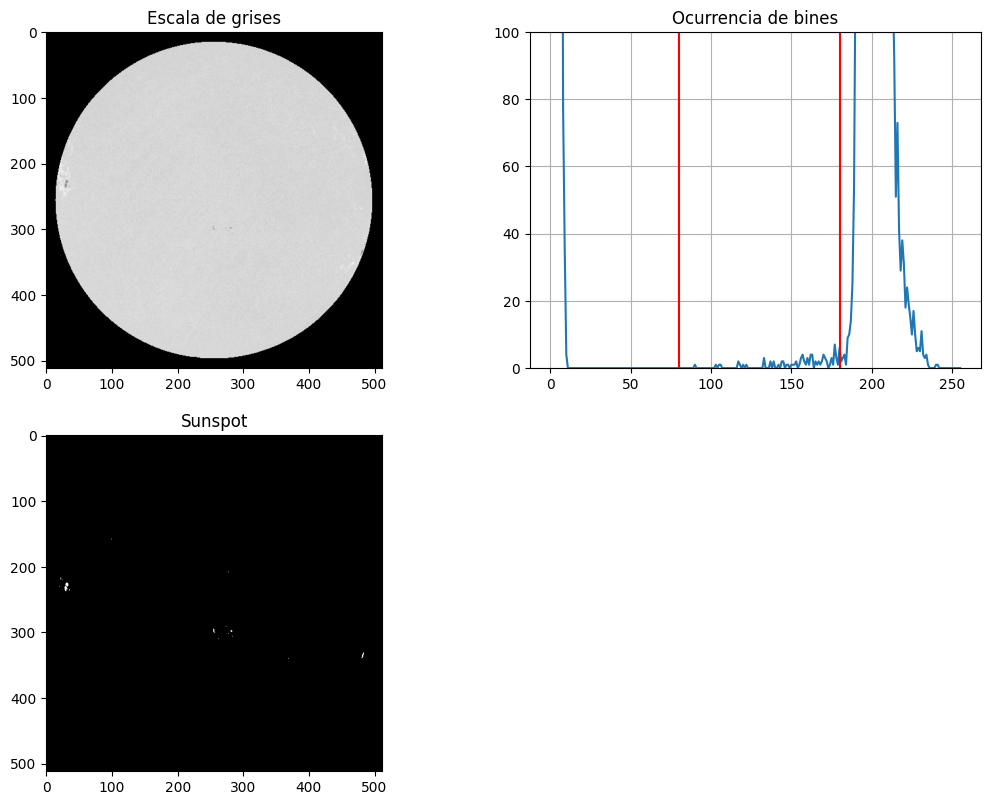

Tamaños de caja (S): [  2   3   5  10  17  29  50  87 149 256]
Conteos (N): [1, 1, 1, 1, 5, 4, 4, 6, 5, 4]
   n_pixel  B_entropy_g  B_entropy_f  D_fractal
0       90     6.731547     0.009003   0.406137


In [ ]:
# Imagen
imagepath = "20240101_1200_hmiigr_512.jpg"
format="hmiigr"
# filtros
u_down=80
u_up=180

# procesamiento
image, gray_image, filter_image = process_hmiigr512(imagepath ,u_down, u_up)

# Histograma
hist = cv2.calcHist([gray_image],[0],None,[256],[0,256])

# Graficar
plot_image_processing(imagepath,format, u_down, u_up)

df = extract_values(imagepath,format, u_down, u_up)
print(df)

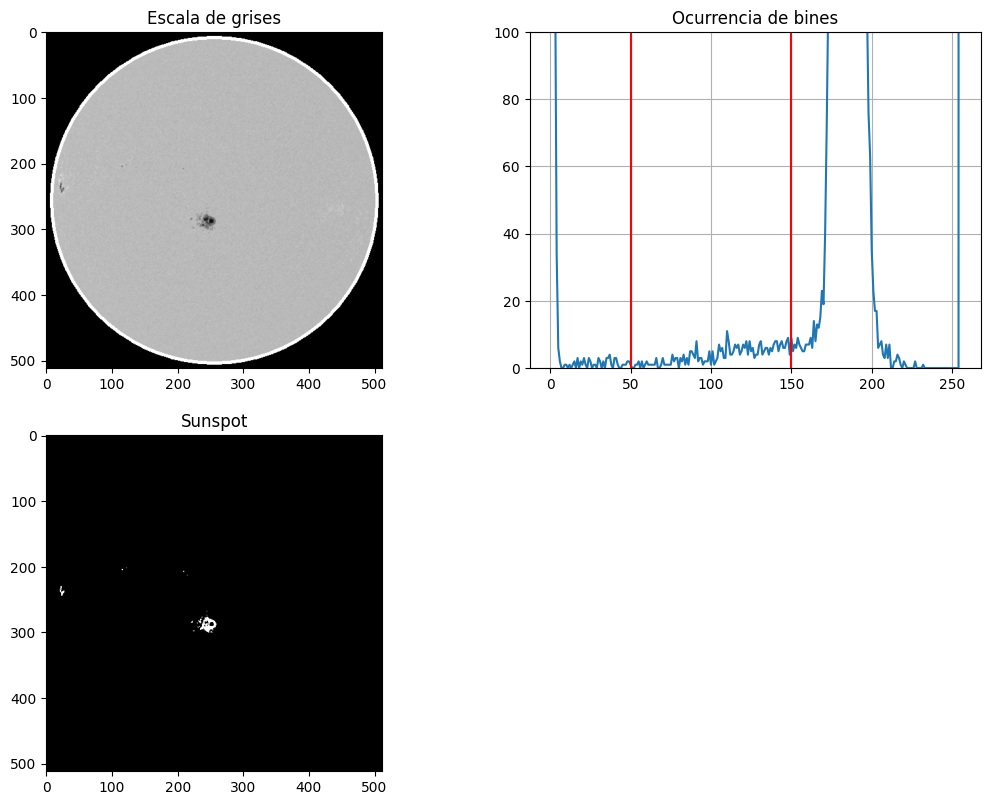

Tamaños de caja (S): [  2   3   5  10  17  29  50  87 149 256]
Conteos (N): [1, 1, 1, 1, 3, 3, 4, 2, 2, 2]
   n_pixel  B_entropy_g  B_entropy_f  D_fractal
0      386      6.95819     0.028438    0.20795


In [ ]:
# Imagen
imagepath = "20040107_1241_mdiigr_512.jpg"
format="mdiigr"
# filtros
u_down=50
u_up=150

# procesamiento
image, gray_image, filter_image = process_mdiigr512(imagepath, u_down, u_up)

# Histograma
hist = cv2.calcHist([gray_image],[0],None,[256],[0,256])

# Graficar
plot_image_processing(imagepath,format, u_down, u_up)

df = extract_values(imagepath,format, u_down, u_up)
print(df)